In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv('salaries.csv')
#  print(data)
data_numeric = pd.DataFrame()
data_features = []

le = LabelEncoder()
for i in data.columns:
  if not i in  data.describe().columns:
    data[f'{i}_numeric'] = le.fit_transform(data[i])
    data_numeric[f'{i}_numeric'] = le.fit_transform(data[i])
    data_features.append(i)
  else:
    data_numeric[i] = data[i]
    data_features.append(i)

In [7]:
X = data_numeric.iloc[:, data_numeric.columns!='salary_in_usd']
y = data_numeric.iloc[:, data_numeric.columns=='salary_in_usd']
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [19]:
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor
 
# create regressor object
regressor = RandomForestRegressor(n_estimators=100,
                                  random_state=0)
 
# fit the regressor with x and y data
regressor.fit(X_train, y_train)
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [1,2,3,4],
}
regr = RandomForestRegressor(random_state=0)

model = GridSearchCV(regr, parameters)

model.fit(X_train, y_train)
model

/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for

GridSearchCV(estimator=RandomForestRegressor(random_state=0),
             param_grid={'max_depth': [1, 2, 3, 4],
                         'n_estimators': [100, 150, 200, 250, 300]})

In [17]:
y_pred = regressor.predict(X_test)
mean_squared_error(y_test, y_pred)


0.025965105770321257

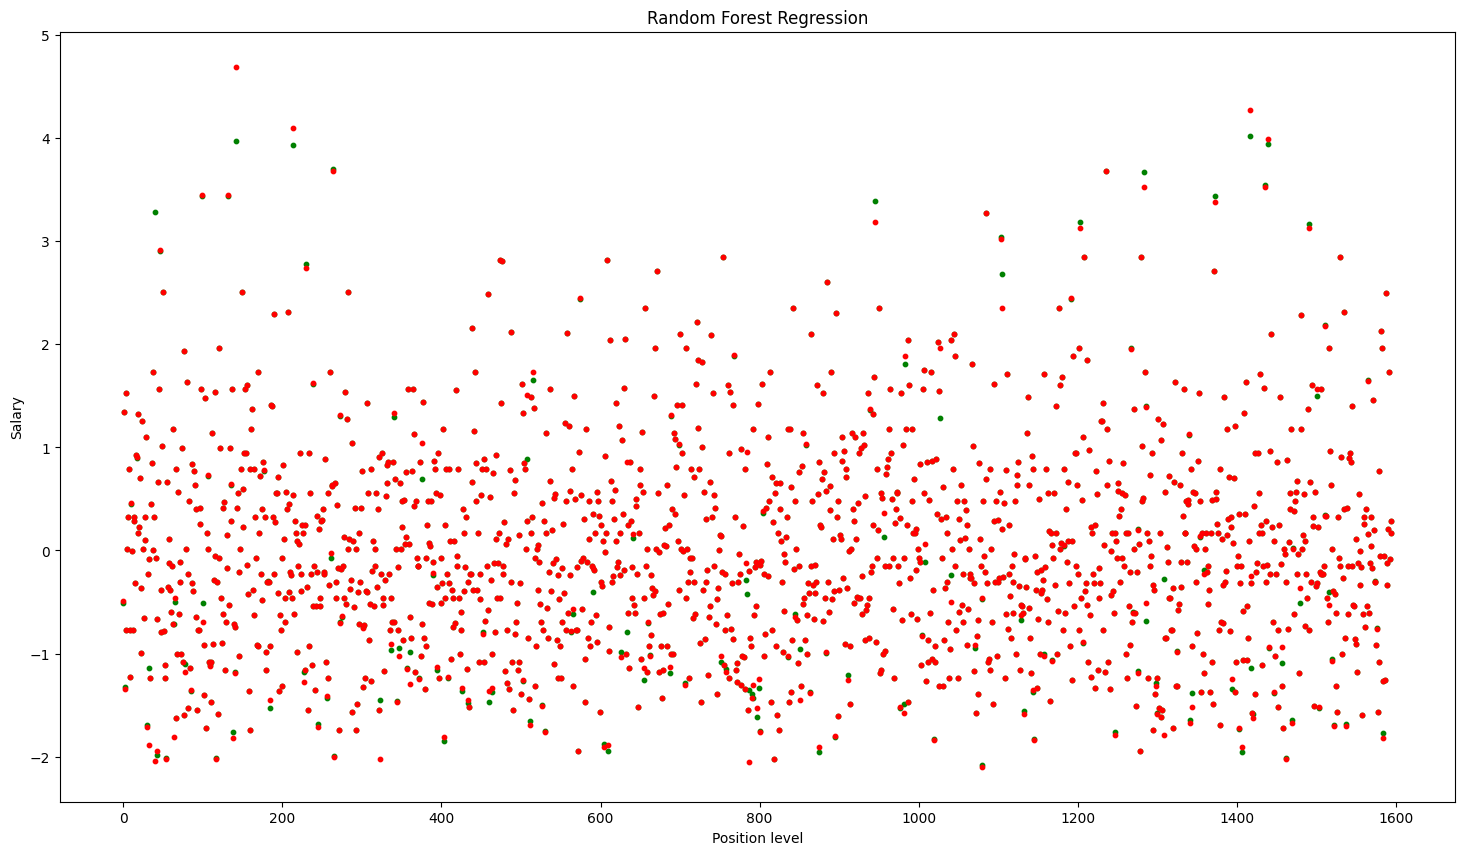

In [15]:
# Visualising the Random Forest Regression results
 
# arrange for creating a range of values
# from min value of x to max
# value of x with a difference of 0.01
# between two consecutive values
# X_grid = np.arange(min(X_test.experience_level_numeric), max(X_test.experience_level_numeric), 0.01)
 
# reshape for reshaping the data 
# into a len(X_grid)*1 array,
# i.e. to make a column out of the X_grid value
# Y_grid = Y_grid.reshape((len(Y_grid), 1))

# Scatter plot for original data
# X_grid = X_grid.reshape((len(X_grid), 1))
index = np.arange(0, len(y_pred), 1)
index
# plt.scatter(X_test.experience_level_numeric, y_pred, color='blue')
# plot predicted data
# plt.plot(X_grid, regressor.predict(X_grid), color='green')
# plt.scatter(X_test.experience_level_numeric, y_pred, color='blue', label='Predicted data', s=10)
# plt.scatter(X_test.experience_level_numeric, y_test, color='red', label='Predicted data', s=1 )
y_pred = y_pred.reshape((len(y_pred), 1))
plt.rcParams["figure.figsize"] = (18, 10)
plt.scatter(index, y_pred, color='green', label='Predicted data', s=10)
plt.scatter(index, y_test, color='red', label='Predicted data', s =10)
# color='green')
plt.title('Random Forest Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()